In [111]:
import os 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
def centroidEstimation(image_path ):
    connectivity=4
    img = cv2.imread(image_path)
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    
    analysis = cv2.connectedComponentsWithStats(grayscale_img,
                                                connectivity,
                                                cv2.CV_32S)
    (totalLabels, label_ids, values, centroid) = analysis
    
    return centroid[1]
    

In [128]:
def gettingContours,image_path=None):
    
    
    img = cv2.imread(image_path)
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    
    if image_path==None:
    contours, hierarchies = cv2.findContours(
    grayscale_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    
    ar = {}
    
    for i in contours:
        
        area = cv2.contourArea(i)
        M = cv2.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            cv2.drawContours(img, [i], -1, (0, 255, 0), 2)
            cv2.circle(img, (cx, cy), 7, (0, 0, 255), 1)
            cv2.putText(img, "center", (cx - 20, cy - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
            ar[area] = [cx,cy]
            print(f"Area: {area} | x: {cx} y: {cy}")
            
            
    print(ar)
            
    if len(ar) ==3:
        return list(ar.values())[1]
    
    else:
        return list(ar.values())[0]
            

    

In [132]:
MASK_PATH = '/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/val_masks/061_GT2_IN_F_RI_01_1.bmp'

In [133]:
d_ar = gettingContours(MASK_PATH)

Area: 127.0 | x: 85 y: 46
Area: 1975.0 | x: 83 y: 46
{127.0: [85, 46], 1975.0: [83, 46]}


In [134]:
d_ar

[85, 46]

In [118]:
len(d_ar)

3

In [96]:
centroidEstimation(MASK_PATH)

array([153.48951348,  57.20088458])

In [81]:
img = cv2.imread(MASK_PATH)


grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# print(img.shape)
# plt.imshow(img)

In [82]:
connectivity=4
analysis = cv2.connectedComponentsWithStats(grayscale_img,
                                                connectivity,
                                                cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis



# Loop through each component 
for i in range(0, totalLabels): 
    
      # Area of the component 
    area = values[i, cv2.CC_STAT_AREA]
    
    print(area)

56428
7009
1


In [83]:
print(totalLabels)

3


In [84]:
values

array([[    0,     0,   327,   194, 56428],
       [  106,    10,    96,    96,  7009],
       [  204,    52,     1,     1,     1]], dtype=int32)

In [85]:
cv2.circle(img,(int(centroid[1][0]),int(centroid[1][1])),3,(0,255,0),1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [86]:
# for row in centroid:
#     cv2.circle(img,(int(centroid[1][0]),int(centroid[1][1])),3,(0,255,0),4)
    

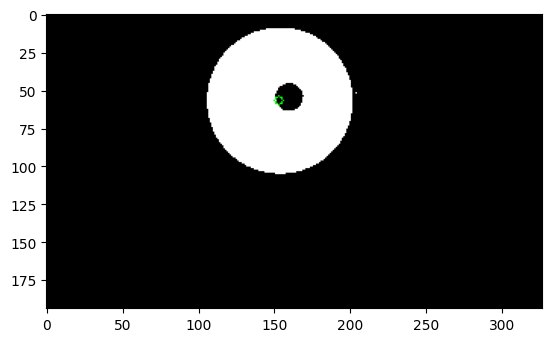

In [87]:
plt.imshow(img)

In [88]:
contours, hierarchies = cv2.findContours(
    grayscale_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [89]:
for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(img, [i], -1, (0, 255, 0), 2)
        cv2.circle(img, (cx, cy), 7, (0, 0, 255), 1)
        cv2.putText(img, "center", (cx - 20, cy - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        print(f"x: {cx} y: {cy}")

x: 159 y: 54
x: 153 y: 57


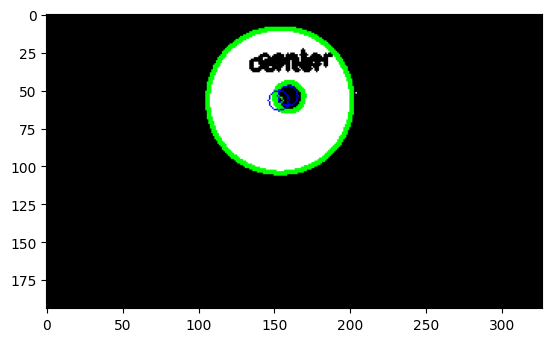

In [90]:
plt.imshow(img)

In [142]:
MASK_PATH = '/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/val_masks'

In [143]:
saved_location = '/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/CenterLocation'

In [144]:
if not os.path.exists(saved_location):
    os.makedirs(saved_location)

In [147]:
for f in os.scandir(MASK_PATH):
    
    # print(f.path)
    
    # cen_coordinates = centroidEstimation(f.path)
    
    # print(cen_coordinates)
    
    ar = gettingContours(f.path)
    
    with open(os.path.join(saved_location,f.path.split('/')[-1].split('.')[0]+'.txt'),'w') as k:
        
        k.write(f'{str(ar[0])} {str(ar[1])}')
        
    
    print(ar)
    


Area: 2.0 | x: 345 y: 190
Area: 2560.0 | x: 315 y: 192
Area: 39119.0 | x: 305 y: 181
{2.0: [345, 190], 2560.0: [315, 192], 39119.0: [305, 181]}
[315, 192]
Area: 2.0 | x: 328 y: 242
Area: 1793.0 | x: 303 y: 243
Area: 28392.5 | x: 299 y: 241
{2.0: [328, 242], 1793.0: [303, 243], 28392.5: [299, 241]}
[303, 243]
Area: 3076.5 | x: 380 y: 213
Area: 44916.0 | x: 369 y: 211
{3076.5: [380, 213], 44916.0: [369, 211]}
[380, 213]
Area: 913.0 | x: 193 y: 105
Area: 10058.0 | x: 195 y: 107
{913.0: [193, 105], 10058.0: [195, 107]}
[193, 105]
Area: 2.0 | x: 353 y: 237
Area: 2253.0 | x: 325 y: 239
Area: 30380.5 | x: 317 y: 246
{2.0: [353, 237], 2253.0: [325, 239], 30380.5: [317, 246]}
[325, 239]
Area: 2.0 | x: 991 y: 629
Area: 17571.0 | x: 913 y: 636
Area: 352423.0 | x: 904 y: 633
{2.0: [991, 629], 17571.0: [913, 636], 352423.0: [904, 633]}
[913, 636]
Area: 2.0 | x: 431 y: 200
Area: 3983.0 | x: 394 y: 203
Area: 51470.0 | x: 400 y: 213
{2.0: [431, 200], 3983.0: [394, 203], 51470.0: [400, 213]}
[394, 203]

In [141]:
with open('x.txt','w') as f:
    f.write('s')

In [150]:
import os
import cv2
import numpy as np
import torch
import dlib
from imutils import face_utils
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url
from torchvision import transforms  
import torch.nn as nn
from torch.utils.data import Dataset
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn.functional as F
import math
import time
from imutils import face_utils
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import mediapipe
# from BaseModels.resnetModels import BB_model
from BaseModels.efficientnetModels import BB_model
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from scipy.spatial import distance
import sys
sys.path.append("../LuminEye-MainPipeLine/")
# device = "cpu"

In [165]:
model = torch.load(
    "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/U2NET_MULTICLASS_IMG_256_DIC_batch_8/Miche_model_2023_04_11_22:14:26_val_iou0.900.pt", map_location=device)


model.eval()

RESIZE_AMT = 256

In [166]:
val_images = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/val_img"

val_masks = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/MICHE_MULTICLASS/Dataset/val_masks/"
n_classes = 3
batch_size = 1

img_resize = 256

colors = [[0,   0,   0], [0, 255, 0], [0, 0, 255]]
label_colours = dict(zip(range(n_classes), colors))

valid_classes = [0, 85, 170]
class_names = ["Background", "Pupil", "Iris"]

gan_model_path = "/home/nipun/Music/Real-ESRGAN/experiments/net_g_latest.pth"
dni_weight = None
tile = 0
tile_pad = 10
pre_pad = 0
fp32 = True
gpu_id = 0
netscale = 2


class_map = dict(zip(valid_classes, range(len(valid_classes))))
n_classes = len(valid_classes)

In [167]:
def decode_segmap(temp):
    # convert gray scale to color
    # temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [168]:

valid_x = sorted(
    glob(f"{val_images}/*"))
valid_y = sorted(glob(f"{val_masks }/*"))

In [169]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

In [170]:
class Iris(Dataset):
    def __init__(self, images, masks, transform=None, enhance=True):
        self.transforms = transform
        self.images = images
        self.masks = masks
        self.enhance = enhance

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        if self.enhance:
            img = cv2.imread(self.images[index])
            img, _ = upsampler.enhance(img, outscale=2)
            img = np.array(img[:, :, ::-1])

        else:
            img = np.array(Image.open(self.images[index]))

        h, w = img.shape[:2]

        mask = np.array(Image.open(self.masks[index]))
        if self.transforms is not None:
            aug = self.transforms(image=img, mask=mask)
            img = aug['image']
            mask = aug['mask']
        return img, mask, (h, w), self.images[index].split("/")[-1]

In [171]:
def get_images(test_x, test_y, val_transform, batch_size=1, shuffle=True, pin_memory=True):

    val_data = Iris(test_x, test_y, transform=val_transform, enhance=False)
    test_batch = torch.utils.data.DataLoader(
        val_data, batch_size=batch_size, shuffle=False, drop_last=True)
    return test_batch


val_transform = A.Compose([
    A.Resize(img_resize, img_resize),
    A.augmentations.transforms.Normalize(
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

val_batch = get_images(valid_x, valid_y, val_transform, batch_size=batch_size)

val_cls = Iris(valid_x, valid_y, transform=val_transform, enhance=False)

In [274]:
def mean_squared_difference(point_gt, point_pred):
    # Calculate squared differences for each coordinate
    squared_diff_x = (point_gt[0] - point_pred[0]) ** 2
    squared_diff_y = (point_gt[1] - point_pred[1]) ** 2
    
    # Calculate mean squared difference
    mean_squared_diff = (squared_diff_x + squared_diff_y) / 2
    
    return mean_squared_diff

In [276]:
from PIL import Image
import numpy as np
 
from sklearn.metrics import mean_squared_error
  

def main():
    
    mse = 0

   
    unorm = UnNormalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    

    start_time = time.time()
    for i in range(len(val_batch)):
        image, mask, (h, w), image_name = val_cls[i]
        
        # print(f'Image shape: {image.shape}')

        gt,pred= predImage(
            image=image, mask=mask)
        
        
       
        
        
        gt_image = Image.fromarray(np.uint8(gt)).convert('RGB')
        
       
        gt_img = cv2.cvtColor(np.array(gt_image), cv2.COLOR_RGB2BGR)
        
        
        pred_img = Image.fromarray(np.uint8(pred)).convert('RGB')
        
       
        pred_img = cv2.cvtColor(np.array(pred_img), cv2.COLOR_RGB2BGR)
        
       
        gt_coord = gettingContours(gt_img)
        print('***************')
        pred_coord = gettingContours(pred_img)
        
        
        # print('########')
        mse += mean_squared_difference(pred_coord,gt_coord)
        
        
        
       
    return mse

        

In [277]:
mse = main()

Area: 6444.5 | x: 113 y: 132
{6444.5: [113, 132]}
***************
Area: 6414.0 | x: 113 y: 133
{6414.0: [113, 133]}
Area: 6925.0 | x: 116 y: 119
{6925.0: [116, 119]}
***************
Area: 6737.0 | x: 116 y: 121
{6737.0: [116, 121]}
Area: 6182.5 | x: 118 y: 119
{6182.5: [118, 119]}
***************
Area: 6229.0 | x: 117 y: 119
{6229.0: [117, 119]}
Area: 8400.0 | x: 112 y: 93
{8400.0: [112, 93]}
***************
Area: 7573.5 | x: 112 y: 98
{7573.5: [112, 98]}
Area: 9790.0 | x: 102 y: 94
{9790.0: [102, 94]}
***************
Area: 8584.0 | x: 101 y: 101
{8584.0: [101, 101]}
Area: 7502.0 | x: 140 y: 119
{7502.0: [140, 119]}
***************
Area: 7567.0 | x: 142 y: 118
{7567.0: [142, 118]}
Area: 8364.0 | x: 122 y: 143
{8364.0: [122, 143]}
***************
Area: 8069.5 | x: 122 y: 144
{8069.5: [122, 144]}
Area: 7256.0 | x: 137 y: 128
{7256.0: [137, 128]}
***************
Area: 7142.5 | x: 136 y: 128
{7142.5: [136, 128]}
Area: 9686.5 | x: 137 y: 126
{9686.5: [137, 126]}
***************
Area: 9786.0

In [278]:
mse/len(val_cls)

51.96917808219178

In [266]:
def mean_squared_difference(ground_truth, prediction):
    # Ensure both lists have the same length
    assert len(ground_truth) == len(prediction), "Ground truth and prediction lists must have the same length"
    
    # Calculate squared differences
    squared_diff = [(gt - pred) ** 2 for gt, pred in zip(ground_truth, prediction)]
    
    # Calculate mean squared difference
    mean_squared_diff = sum(squared_diff) / len(ground_truth)
    
    return mean_squared_diff

In [257]:
def predImage(image, mask):

    

    image = image.to(device)
    mask = mask.to(device)

    image = image.unsqueeze(0)
    mask = mask.unsqueeze(0)

    unnorm = UnNormalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])

    with torch.no_grad():

        softmax = nn.Softmax(dim=1)

        model_output, _, _, _, _, _, _ = model(image)

        predicted_label = F.softmax(model_output, dim=1)
        predicted_label = torch.argmax(predicted_label, dim=1)

        # Predicted Mask
        pred_mask = predicted_label.permute(
            1, 2, 0).squeeze(-1).detach().cpu().numpy()

        # GT Mask

        gt_mask = mask.permute(1, 2, 0).squeeze(-1).detach().cpu().numpy()

        pred_mask = decode_segmap(pred_mask) * 255.0

        gt_mask = decode_segmap(gt_mask) * 255.0

        gt_grayscale = np.argmax(gt_mask, axis=-1)
        pred_grayscale = np.argmax(pred_mask, axis=-1)
        
        
        
        
    return gt_grayscale,pred_grayscale


In [258]:
main()

Area: 6444.5 | x: 113 y: 132
{6444.5: [113, 132]}
***************
Area: 6414.0 | x: 113 y: 133
{6414.0: [113, 133]}
Area: 6925.0 | x: 116 y: 119
{6925.0: [116, 119]}
***************
Area: 6737.0 | x: 116 y: 121
{6737.0: [116, 121]}
Area: 6182.5 | x: 118 y: 119
{6182.5: [118, 119]}
***************
Area: 6229.0 | x: 117 y: 119
{6229.0: [117, 119]}
Area: 8400.0 | x: 112 y: 93
{8400.0: [112, 93]}
***************
Area: 7573.5 | x: 112 y: 98
{7573.5: [112, 98]}
Area: 9790.0 | x: 102 y: 94
{9790.0: [102, 94]}
***************
Area: 8584.0 | x: 101 y: 101
{8584.0: [101, 101]}
Area: 7502.0 | x: 140 y: 119
{7502.0: [140, 119]}
***************
Area: 7567.0 | x: 142 y: 118
{7567.0: [142, 118]}
Area: 8364.0 | x: 122 y: 143
{8364.0: [122, 143]}
***************
Area: 8069.5 | x: 122 y: 144
{8069.5: [122, 144]}
Area: 7256.0 | x: 137 y: 128
{7256.0: [137, 128]}
***************
Area: 7142.5 | x: 136 y: 128
{7142.5: [136, 128]}
Area: 9686.5 | x: 137 y: 126
{9686.5: [137, 126]}
***************
Area: 9786.0

In [259]:
def gettingContours(img):
    
    img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    contours, hierarchies = cv2.findContours(
    img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    
    ar = {}
    
    for i in contours:
        
        area = cv2.contourArea(i)
        M = cv2.moments(i)
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            # cv2.drawContours(img, [i], -1, (0, 255, 0), 2)
            # cv2.circle(img, (cx, cy), 7, (0, 0, 255), 1)
            # cv2.putText(img, "center", (cx - 20, cy - 20),
            #         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
            ar[area] = [cx,cy]
            print(f"Area: {area} | x: {cx} y: {cy}")
            
            
    print(ar)
            
    if len(ar) ==3:
        return list(ar.values())[1]
    
    else:
        return list(ar.values())[0]
            

    